# Building a Euribor Dual Curve and Valuing a Swap - Bloomberg Example

We build an OIS curve from OIS swaps that include forward starting OIS using MM dates.

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
from financepy.finutils import *
from financepy.products.funding import *

In [63]:
valuationDate = FinDate(26, 10, 2020)

In [64]:
valuationDate.addWeekDays(2).addTenor("1D")

THU 29 OCT 2020

In [83]:
interpType = FinInterpTypes.LINEAR_ZERO_RATES

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [84]:
cal = FinCalendarTypes.TARGET

depoDCCType = FinDayCountTypes.ACT_360
depos = []

spotDays = 2
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "1D", -0.46800/100.0, depoDCCType, calendarType = cal); depos.append(depo)

fras = []

swaps = []
swapType = FinSwapTypes.PAYER
spotDays = 2
settlementDate = valuationDate.addWeekDays(spotDays)
fixedDCCType = FinDayCountTypes.ACT_360
fixedFreqType = FinFrequencyTypes.ANNUAL

# Standard OIS with standard annual terms
swap = FinOIS(settlementDate, "1W", swapType, -0.47000/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "2W", swapType, -0.47150/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "1M", swapType, -0.47300/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "2M", swapType, -0.47700/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "3M", swapType, -0.48150/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "4M", swapType, -0.48500/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "5M", swapType, -0.48900/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "6M", swapType, -0.49300/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "7M", swapType, -0.49700/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "8M", swapType, -0.50065/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "9M", swapType, -0.50375/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "10M", swapType, -0.50790/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "11M", swapType, -0.51100/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "12M", swapType, -0.51400/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "18M", swapType, -0.53250/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "2Y", swapType, -0.54300/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "30M", swapType, -0.54850/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "3Y", swapType, -0.54900/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "4Y", swapType, -0.53700/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "5Y", swapType, -0.51350/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "6Y", swapType, -0.48300/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "7Y", swapType, -0.44650/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "8Y", swapType, -0.40480/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "9Y", swapType, -0.36220/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "10Y", swapType, -0.31550/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "11Y", swapType, -0.27100/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "12Y", swapType, -0.22850/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "15Y", swapType, -0.12300/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "20Y", swapType, -0.04000/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "25Y", swapType, -0.03450/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "30Y", swapType, -0.05750/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "35Y", swapType, -0.08160/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "40Y", swapType, -0.10485/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)
swap = FinOIS(settlementDate, "50Y", swapType, -0.14300/100.0, fixedFreqType, fixedDCCType, calendarType = cal); swaps.append(swap)

oisDepos = depos.copy()
oisFras = fras.copy()
oisSwaps = swaps.copy()

In [85]:
oisCurve = FinOISCurve(valuationDate, oisDepos, oisFras, oisSwaps, interpType)

Inserting synthetic deposit


In [86]:
for depo in oisDepos:
    start = depo._startDate
    maturityDate = depo._maturityDate
    df = oisCurve.df(maturityDate) / oisCurve.df(start)
    days = maturityDate - settlementDate
    ccZeroRate = oisCurve.zeroRate(maturityDate, FinFrequencyTypes.CONTINUOUS, FinDayCountTypes.ACT_365F)
    print("%12s  %12s  %5.0f  %12.9f  %9.6f"% (start, maturity, days, df, ccZeroRate*100))
    
for swap in oisSwaps:
    start = swap._startDate
    maturityDate = swap._maturityDate
    df = oisCurve.df(maturityDate) / oisCurve.df(start)
    days = maturityDate - settlementDate
    ccZeroRate = oisCurve.zeroRate(maturityDate, FinFrequencyTypes.CONTINUOUS, FinDayCountTypes.ACT_365F)
    print("%12s  %12s  %5.0f  %12.9f  %9.6f"% (start, maturity, days, df, ccZeroRate*100))

MON 26 OCT 2020  TUE 28 OCT 2070      0   1.000026001  -0.474506
WED 28 OCT 2020  TUE 28 OCT 2070      1   1.000013000  -0.474505
WED 28 OCT 2020  TUE 28 OCT 2070      7   1.000091397  -0.476095
WED 28 OCT 2020  TUE 28 OCT 2070     14   1.000183395  -0.477644
WED 28 OCT 2020  TUE 28 OCT 2070     33   1.000433771  -0.479378
WED 28 OCT 2020  TUE 28 OCT 2070     61   1.000808904  -0.483525
WED 28 OCT 2020  TUE 28 OCT 2070     92   1.001232016  -0.488191
WED 28 OCT 2020  TUE 28 OCT 2070    124   1.001673351  -0.491867
WED 28 OCT 2020  TUE 28 OCT 2070    152   1.002068938  -0.496021
WED 28 OCT 2020  TUE 28 OCT 2070    182   1.002498616  -0.500189
WED 28 OCT 2020  TUE 28 OCT 2070    212   1.002935369  -0.504360
WED 28 OCT 2020  TUE 28 OCT 2070    243   1.003390846  -0.508186
WED 28 OCT 2020  TUE 28 OCT 2070    273   1.003834753  -0.511454
WED 28 OCT 2020  TUE 28 OCT 2070    306   1.004335869  -0.515799
WED 28 OCT 2020  TUE 28 OCT 2070    335   1.004777858  -0.519067
WED 28 OCT 2020  TUE 28 O

## Value an OIS Contract

In [87]:
fixedCpn = -0.515039/100
startDate = settlementDate
maturityDate = FinDate(28, 10, 2025,)
fixedDCCType = FinDayCountTypes.ACT_360
fixedFreqType = FinFrequencyTypes.ANNUAL
floatDCCType = FinDayCountTypes.ACT_360
floatFreqType = FinFrequencyTypes.ANNUAL
notional = 10 * ONE_MILLION

In [88]:
oisSwap = FinOIS(startDate, maturityDate, FinSwapTypes.RECEIVER, 
                 fixedCpn, fixedFreqType, fixedDCCType, 
                 notional, 
                 0.0, floatFreqType, floatDCCType)

In [89]:
oisSwap.value(settlementDate, oisCurve)

-793.3871828497504

In [90]:
oisSwap.printFixedLegPV()

START DATE: WED 28 OCT 2020
MATURITY DATE: TUE 28 OCT 2025
COUPON (%): -0.515039
FIXED LEG FREQUENCY: FinFrequencyTypes.ANNUAL
FIXED LEG DAY COUNT: FinDayCountTypes.ACT_360
VALUATION DATE WED 28 OCT 2020
PAYMENT_DATE     YEAR_FRAC        FLOW         DF         DF*FLOW       CUM_PV
WED 28 OCT 2020          -            -   1.00000000            -            -
THU 28 OCT 2021  1.0138889    -52219.23   1.00523869    -52492.79    -52492.79
FRI 28 OCT 2022  1.0138889    -52219.23   1.01110079    -52798.91   -105291.70
MON 30 OCT 2023  1.0194444    -52505.36   1.01691487    -53393.49   -158685.18
MON 28 OCT 2024  1.0111111    -52076.17   1.02209478    -53226.78   -211911.96
TUE 28 OCT 2025  1.0138889    -52219.23   1.02647202    -53601.58   -265513.54


In [91]:
oisSwap.printFloatLegPV()

START DATE: WED 28 OCT 2020
MATURITY DATE: TUE 28 OCT 2025
SPREAD COUPON (%): 0.0
FLOAT LEG FREQUENCY: FinFrequencyTypes.ANNUAL
FLOAT LEG DAY COUNT: FinDayCountTypes.ACT_360
VALUATION DATE WED 28 OCT 2020
         *** FIRST FLOATING RATE PAYMENT IS IMPLIED ***
PAYMENT_DATE     YEAR_FRAC    RATE(%)       FLOW         DF         DF*FLOW       CUM_PV
WED 28 OCT 2020          -          -            -   1.00000000            -            -
THU 28 OCT 2021  1.0138889   -0.51400    -52113.89   1.00523869    -52386.90    -52386.90
FRI 28 OCT 2022  1.0138889   -0.57183    -57977.40   1.01110079    -58620.99   -111007.89
MON 30 OCT 2023  1.0194444   -0.56083    -57173.70   1.01691487    -58140.79   -169148.68
MON 28 OCT 2024  1.0111111   -0.50122    -50679.35   1.02209478    -51799.10   -220947.78
TUE 28 OCT 2025  1.0138889   -0.42059    -42643.52   1.02647202    -43772.38   -264720.15


## Building the Dual Curve

Build the Ibor Curve

In [92]:
# Need to specify a UK calendar (trade was done in London)
cal = FinCalendarTypes.UK

depoDCCType = FinDayCountTypes.ACT_360
depos = []
spotDays = 2
settlementDate = valuationDate.addWeekDays(spotDays)
depo = FinIborDeposit(settlementDate, "6M", -0.496/100.0, depoDCCType, calendarType=cal); depos.append(depo)
fraDCCType = FinDayCountTypes.ACT_360

fras = []
fra = FinIborFRA(settlementDate.addTenor("1M"), "6M", -0.493/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("2M"), "6M", -0.491/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("3M"), "6M", -0.494/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("4M"), "6M", -0.496/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("5M"), "6M", -0.499/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("6M"), "6M", -0.501/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("7M"), "6M", -0.505/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("8M"), "6M", -0.508/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("9M"), "6M", -0.518/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("10M"), "6M", -0.516/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("11M"), "6M", -0.518/100.0, fraDCCType, calendarType=cal); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("12M"), "6M", -0.519/100.0, fraDCCType, calendarType=cal); fras.append(fra)

swaps = []
swapType = FinSwapTypes.PAYER
fixedDCCType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreqType = FinFrequencyTypes.SEMI_ANNUAL

swap = FinIborSwap(settlementDate, "2Y", swapType, -0.514/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "3Y", swapType, -0.506/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "4Y", swapType, -0.482/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "5Y", swapType, -0.451/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "6Y", swapType, -0.415/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "7Y", swapType, -0.375/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "8Y", swapType, -0.333/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "9Y", swapType, -0.288/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "10Y", swapType, -0.242/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "11Y", swapType, -0.198/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "12Y", swapType, -0.156/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "15Y", swapType, -0.054/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "20Y", swapType, 0.023/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "25Y", swapType, 0.023/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "30Y", swapType, -0.005/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "40Y", swapType, -0.063/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)
swap = FinIborSwap(settlementDate, "50Y", swapType, -0.113/100.0, fixedFreqType, fixedDCCType, calendarType=cal); swaps.append(swap)

iborDepos = depos.copy()
iborFras = fras.copy()
iborSwaps = swaps.copy()

In [93]:
iborDualCurve = FinIborDualCurve(valuationDate, oisCurve, iborDepos, iborFras, iborSwaps, interpType)

Inserting synthetic deposit


In [94]:
for swap in iborSwaps:
    dt = swap._maturityDate
    df = iborDualCurve.df(dt) / iborDualCurve.df(settlementDate)
    ccZeroRate = iborDualCurve.zeroRate(dt, FinFrequencyTypes.CONTINUOUS, FinDayCountTypes.ACT_365F)
    print("%12s %12.9f %9.6f"% (dt, df, ccZeroRate*100))

FRI 28 OCT 2022  1.010346479 -0.514634
MON 30 OCT 2023  1.015346005 -0.506716
MON 28 OCT 2024  1.019501788 -0.482549
TUE 28 OCT 2025  1.022860406 -0.451869
WED 28 OCT 2026  1.025294121 -0.416214
THU 28 OCT 2027  1.026714429 -0.376578
MON 30 OCT 2028  1.027174756 -0.334807
MON 29 OCT 2029  1.026470049 -0.290151
MON 28 OCT 2030  1.024741625 -0.244413
TUE 28 OCT 2031  1.022300210 -0.200552
THU 28 OCT 2032  1.019200901 -0.158539
MON 29 OCT 2035  1.008426136 -0.056061
MON 29 OCT 2040  0.995578058  0.021997
MON 30 OCT 2045  0.994433183  0.022195
FRI 28 OCT 2050  1.001710074 -0.005782
THU 28 OCT 2060  1.025512811 -0.062999
TUE 28 OCT 2070  1.057363972 -0.111528


## Swap Valuation

In [95]:
fixedCpn = -0.449700/100
startDate = settlementDate
maturityDate = FinDate(28, 10, 2025,)
fixedDCCType = FinDayCountTypes.THIRTY_360_BOND
fixedFreqType = FinFrequencyTypes.ANNUAL
floatDCCType = FinDayCountTypes.ACT_360
floatFreqType = FinFrequencyTypes.SEMI_ANNUAL
notional = 10 * ONE_MILLION

In [96]:
iborSwap = FinIborSwap(startDate, maturityDate, FinSwapTypes.RECEIVER, 
                 fixedCpn, fixedFreqType, fixedDCCType, 
                 notional, 
                 0.0, floatFreqType, floatDCCType)

In [97]:
iborSwap.value(settlementDate, oisCurve, iborDualCurve, -0.496/100)

382.2547569545277

In [98]:
iborSwap.printFixedLegPV()

START DATE: WED 28 OCT 2020
MATURITY DATE: TUE 28 OCT 2025
COUPON (%): -0.4497
FIXED LEG FREQUENCY: FinFrequencyTypes.ANNUAL
FIXED LEG DAY COUNT: FinDayCountTypes.THIRTY_360_BOND
VALUATION DATE WED 28 OCT 2020
PAYMENT_DATE     YEAR_FRAC        FLOW         DF         DF*FLOW       CUM_PV
WED 28 OCT 2020          -            -   1.00000000            -            -
THU 28 OCT 2021  1.0000000    -44970.00   1.00523869    -45205.58    -45205.58
FRI 28 OCT 2022  1.0000000    -44970.00   1.01110079    -45469.20    -90674.79
MON 30 OCT 2023  1.0055556    -45219.83   1.01691487    -45984.72   -136659.51
MON 28 OCT 2024  0.9944444    -44720.17   1.02209478    -45708.25   -182367.76
TUE 28 OCT 2025  1.0000000    -44970.00   1.02647202    -46160.45   -228528.20


In [99]:
iborSwap.printFloatLegPV()

START DATE: WED 28 OCT 2020
MATURITY DATE: TUE 28 OCT 2025
SPREAD COUPON (%): 0.0
FLOAT LEG FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FLOAT LEG DAY COUNT: FinDayCountTypes.ACT_360
VALUATION DATE WED 28 OCT 2020
PAYMENT_DATE     YEAR_FRAC    RATE(%)       FLOW         DF         DF*FLOW       CUM_PV
WED 28 OCT 2020          -          -            -   1.00000000            -            -
WED 28 APR 2021  0.5055556   -0.49600    -25075.56   1.00249862    -25138.21    -25138.21
THU 28 OCT 2021  0.5083333   -0.50100    -25467.50   1.00523869    -25600.92    -50739.13
THU 28 APR 2022  0.5055556   -0.51900    -26238.33   1.00814172    -26451.96    -77191.08
FRI 28 OCT 2022  0.5083333   -0.51186    -26019.44   1.01110079    -26308.28   -103499.36
FRI 28 APR 2023  0.5055556   -0.48753    -24647.48   1.01402554    -24993.18   -128492.54
MON 30 OCT 2023  0.5138889   -0.47973    -24652.92   1.01691487    -25069.92   -153562.46
MON 29 APR 2024  0.5055556   -0.41545    -21003.52   1.01953218    -214

## Dual Curve

Look at short end

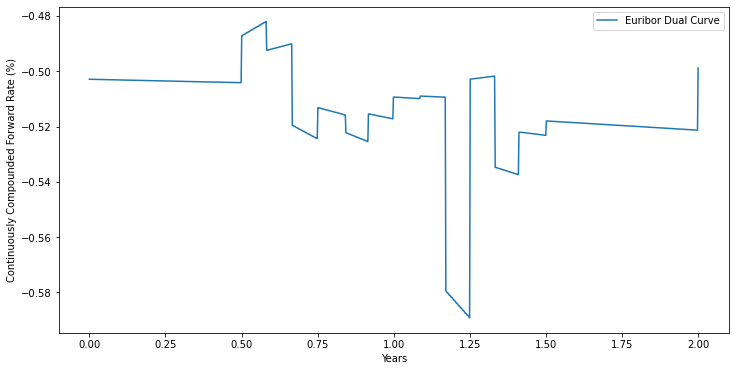

In [109]:
years = np.linspace(0, 2, 1000)
dates = settlementDate.addYears(years)
iborDualCurveFwds = iborDualCurve.fwd(dates)
plt.figure(figsize=(12,6))
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Continuously Compounded Forward Rate (%)")
plt.legend();

Look at long end

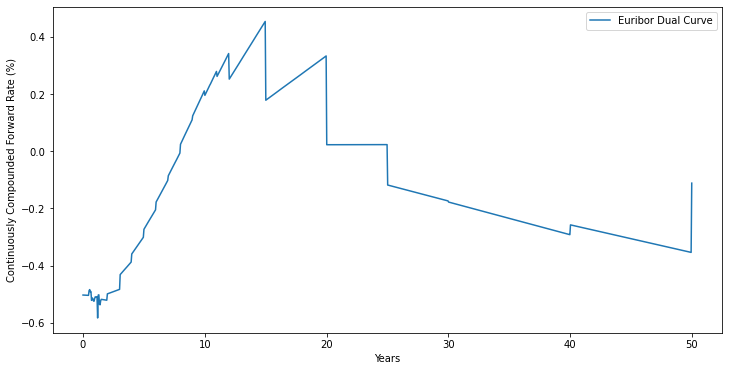

In [110]:
years = np.linspace(0, 50, 1000)
dates = settlementDate.addYears(years)
iborDualCurveFwds = iborDualCurve.fwd(dates)
plt.figure(figsize=(12,6))
plt.plot(years, iborDualCurveFwds*100.0, label="Euribor Dual Curve")
plt.xlabel("Years")
plt.ylabel("Continuously Compounded Forward Rate (%)")
plt.legend();

Copyright (c) Dominic O'Kane 2020